<a href="https://colab.research.google.com/github/qkrwoghd04/multimodal_learning/blob/audio_classification/audio_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import itertools
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

<ipython-input-3-6ad84ed3b82c>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dataset_path = '/content/drive/MyDrive/audio dataset'

In [6]:
import os
def load_data(dataset_path, sr=22050):
    X, y = [], []
    max_length = 30000  # 3초 길이의 오디오에 대한 샘플 수

    for folder_name in ["non_scream", "scream"]:
        folder_path = os.path.join(dataset_path, folder_name)
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            try:
                audio, _ = librosa.load(file_path, sr=sr)
                # 오디오를 max_length에 맞춤
                if len(audio) > max_length:
                    audio = audio[:max_length]
                else:
                    audio = np.pad(audio, (0, max_length - len(audio)), 'constant')

                X.append(audio)
                y.append(1 if folder_name == "scream" else 0)
            except Exception as e:
                print(f"파일 {file_path} 로드 중 오류 발생: {e}")

    return X, y, sr


In [7]:
X,y,sr= load_data(dataset_path)
X = np.array(X)
y = np.array(y)

In [8]:
print(X.shape, y.shape,sr)

(3174, 30000) (3174,) 22050


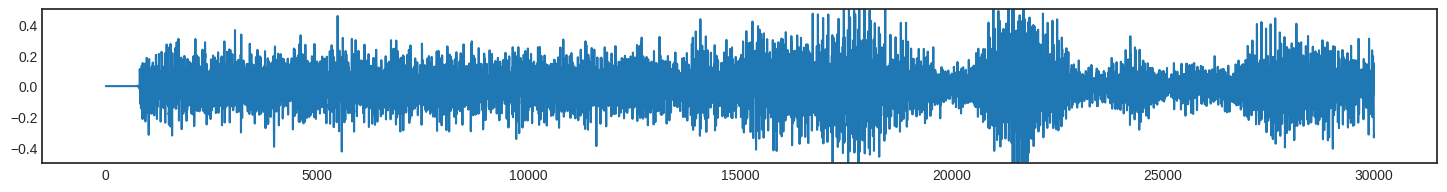

In [9]:
plt.figure(figsize=(18,2))
plt.plot(X[1560])
plt.ylim((-0.5, 0.5))
plt.show()

In [10]:
print(X[0])
ipd.Audio(X[1600], rate=sr)

[-1.70753491e-08 -1.17401040e-08  1.66543703e-08 ...  1.00225285e-02
  1.09056443e-01  1.58215985e-01]


In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
print(X)

[[-1.70753491e-08 -1.17401040e-08  1.66543703e-08 ...  1.00225285e-02
   1.09056443e-01  1.58215985e-01]
 [-1.29742688e-08  2.57303636e-08  3.85918888e-08 ...  1.53321430e-01
   1.57978654e-01  1.23575129e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -5.17177628e-03
  -3.22656636e-03 -1.11638813e-03]
 ...
 [-4.29374936e-09 -6.61889317e-08  7.76696680e-08 ... -1.01725683e-01
  -5.57607338e-02  6.37731049e-03]
 [ 2.97973634e-06 -3.93092705e-06  1.06954894e-06 ...  4.49613854e-02
   4.93426286e-02  4.74255681e-02]
 [-2.07114326e-10  1.34550160e-09 -9.26548144e-11 ... -1.50235161e-01
  -1.85910717e-01 -2.14553326e-01]]


In [13]:
X = np.vstack(X)
X

array([[-1.70753491e-08, -1.17401040e-08,  1.66543703e-08, ...,
         1.00225285e-02,  1.09056443e-01,  1.58215985e-01],
       [-1.29742688e-08,  2.57303636e-08,  3.85918888e-08, ...,
         1.53321430e-01,  1.57978654e-01,  1.23575129e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.17177628e-03, -3.22656636e-03, -1.11638813e-03],
       ...,
       [-4.29374936e-09, -6.61889317e-08,  7.76696680e-08, ...,
        -1.01725683e-01, -5.57607338e-02,  6.37731049e-03],
       [ 2.97973634e-06, -3.93092705e-06,  1.06954894e-06, ...,
         4.49613854e-02,  4.93426286e-02,  4.74255681e-02],
       [-2.07114326e-10,  1.34550160e-09, -9.26548144e-11, ...,
        -1.50235161e-01, -1.85910717e-01, -2.14553326e-01]], dtype=float32)

In [14]:
print(y)

[0 0 0 ... 1 1 1]


In [15]:
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [16]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(2539, 30000)
(635, 30000)
(2539,)
(635,)


Logistic Regression

*   Logistic Regression은 특성상 다중 분류에는 적합하지않음, 이진분류에 좋음


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.5669291338582677


Support Vector Machine



In [18]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x, train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.5385826771653544


Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.7968503937007874


Constant-Q를 이용한 머신러닝 오디오 분류

데이터 준비


>

*   wav는 매 순간의 음압을 측정하여 그 수치를 저장한 형태이기 때문에 그 자체로 음악을 분석하기에 적합하지 않음 (음의 높이와 세기를 듣는것이지 순간의 음압을 듣는게 아니기 때문)
*   푸리에 변환과 같은 변환 기법을 이용하여 시간 축의 데이터를 주파수 축의 데이터로 바꿔줘야할 필요가 있음

*   푸리에 변환 대신 푸리에 변환과 유사한 Constant-Q 변환을 사용
*   Constant-Q 변환은 주파수 축이 로그 단위로 변환되고, 각 주파수에 따라 해상도가 다양하게 처리되기 때문에(저주파는 저해상도, 고주파는 고해상도)음악을 처리하는 데에 푸리에 변환보다 유리


*   주파수 대역을 저장할 리스트 audio_cqt 선언
*   constant-Q 변환할 때는 변환할 오디오 데이터와 sampling rate가 필요
*   해당 데이터에서는 sampling rate가 모두 동일하므로 따로 처리가 필요하지 않음
*   여기서는 Constant-Q 변환을 사용해 오디오 데이터를 주파수 대역으로 변환


*  변환에서 앞서 준비한 데이터를 가져와 사용하며, Constant-Q 변환에는 librosa.cqt 함수를 사용
*   여기서 n_bins는 옥타브 단계 및 개수를, bins_per_octive는 한 옥타브가 가지는 단계를 의미
*   라벨에 대해선 원 핫 인코딩을 적용

In [20]:
audio_cqt = []
for i in X:
    ret = librosa.cqt(i, sr=sr, hop_length=256, n_bins=24*7, bins_per_octave=24)
    ret = np.abs(ret)
    audio_cqt.append(ret)

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=469
  warnings.warn(


<ipython-input-22-2eb9d9ba93e9>:3: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(amp_db, sr=sr, x_axis='time', y_axis='cqt_note')


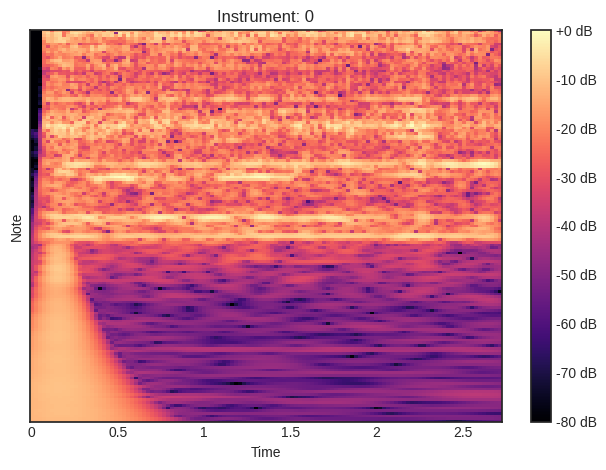

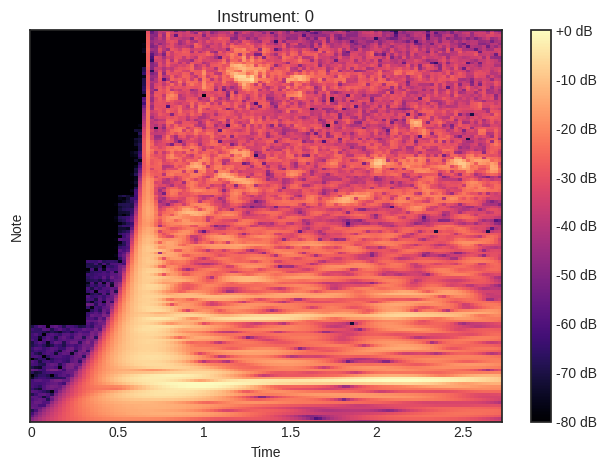

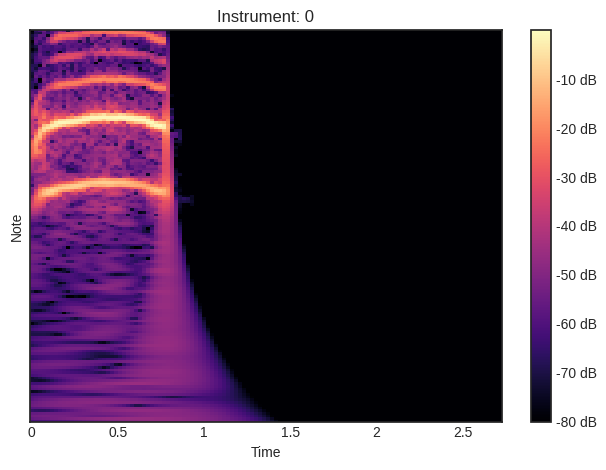

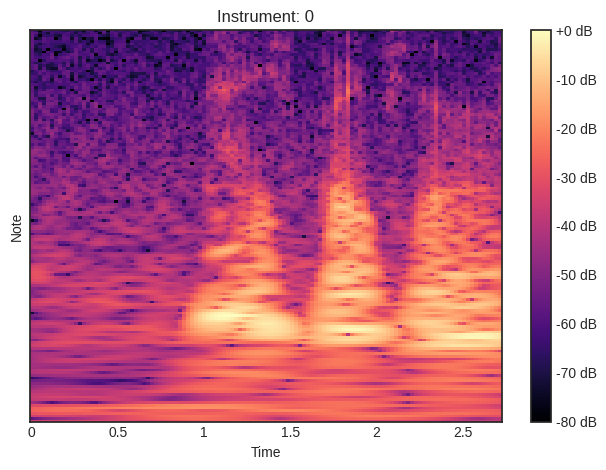

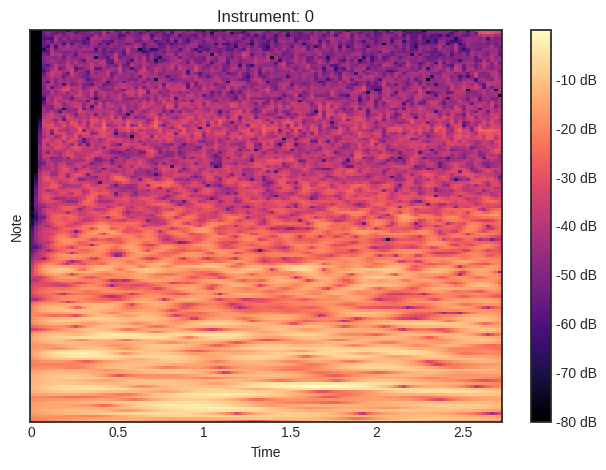

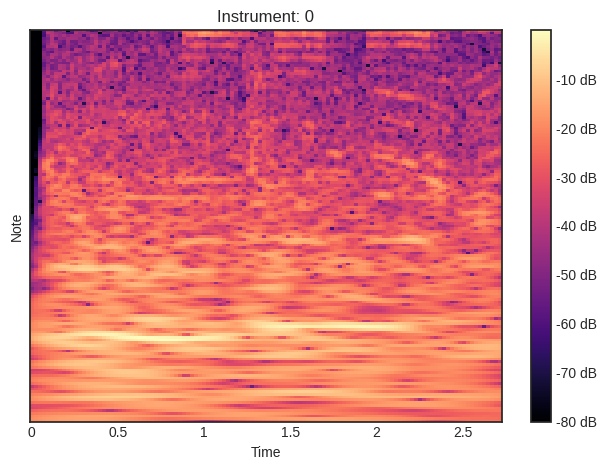

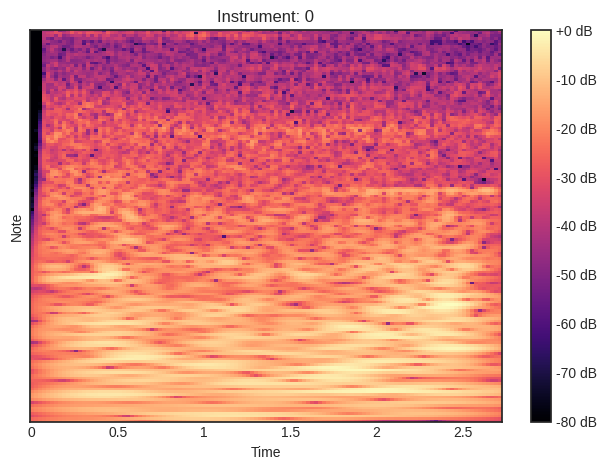

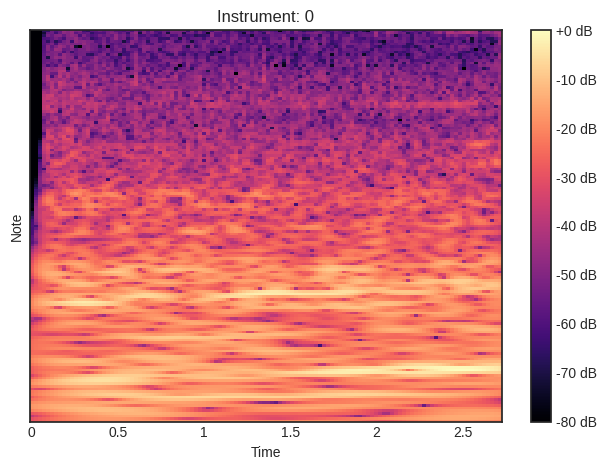

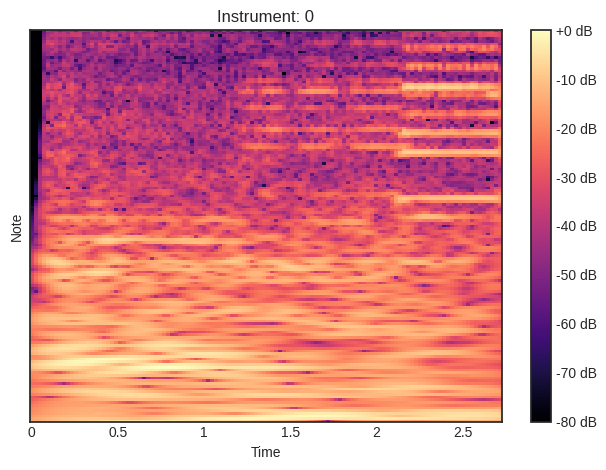

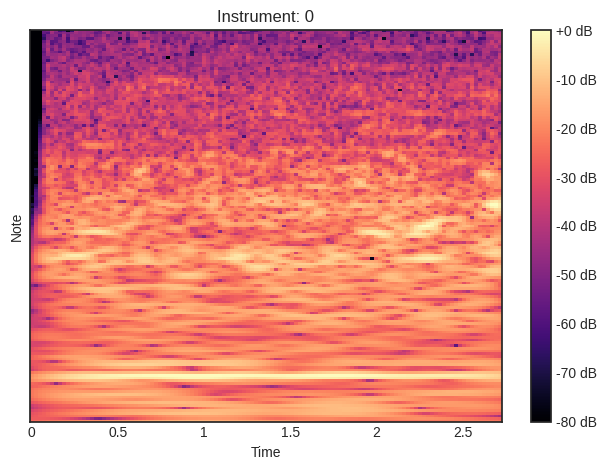

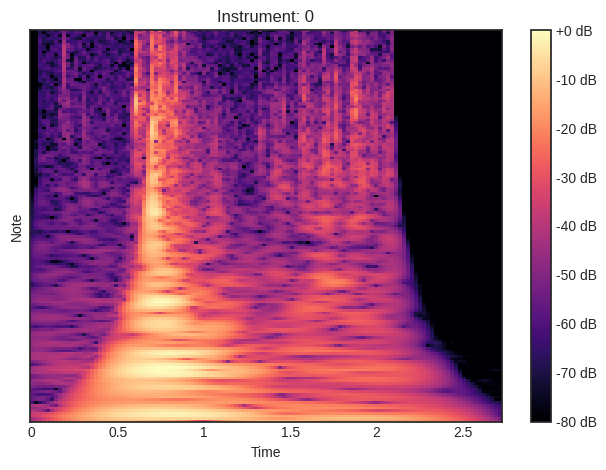

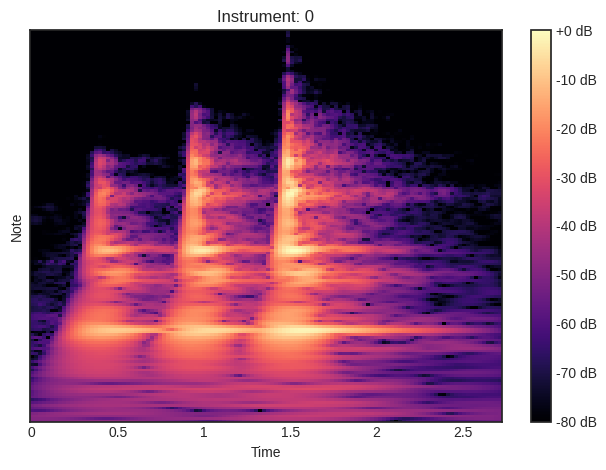

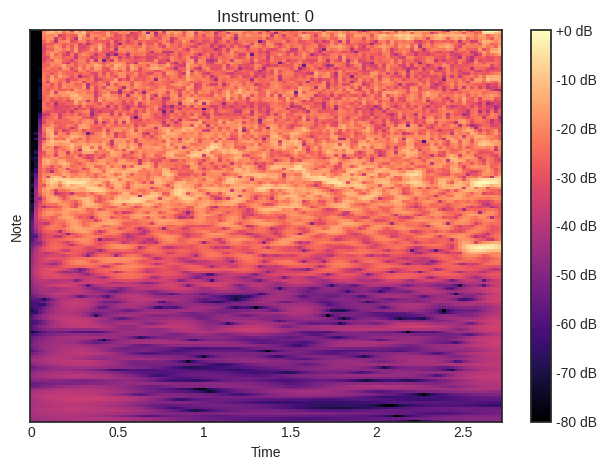

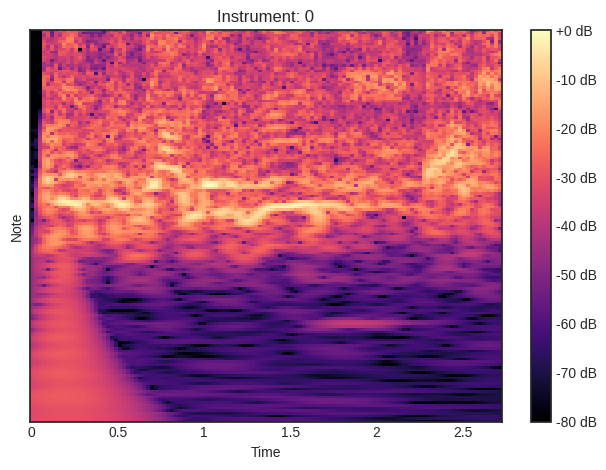

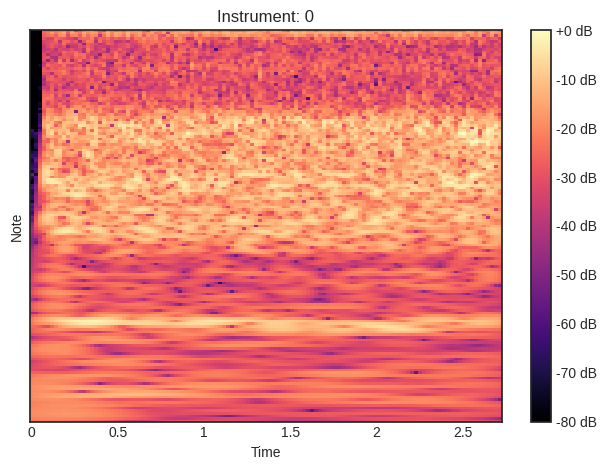

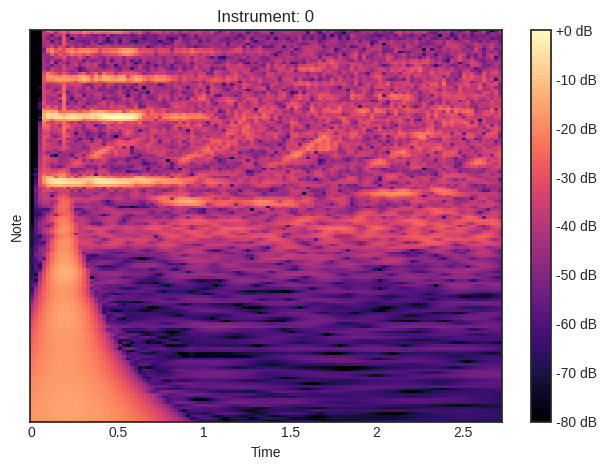

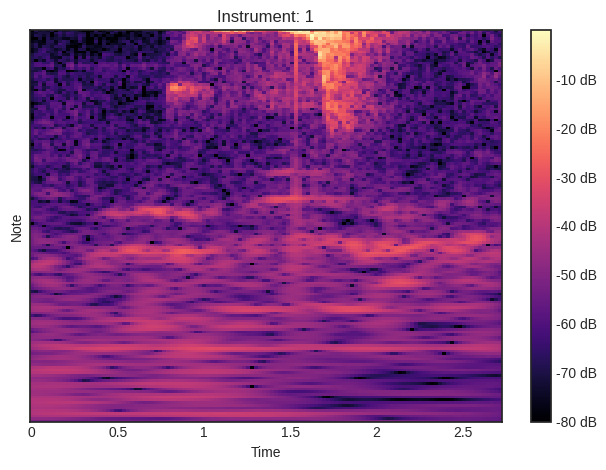

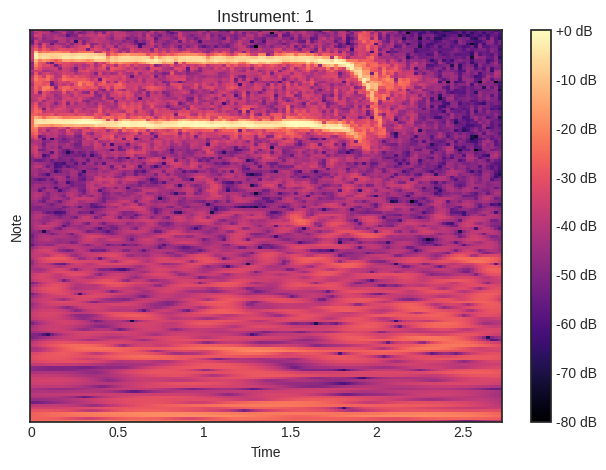

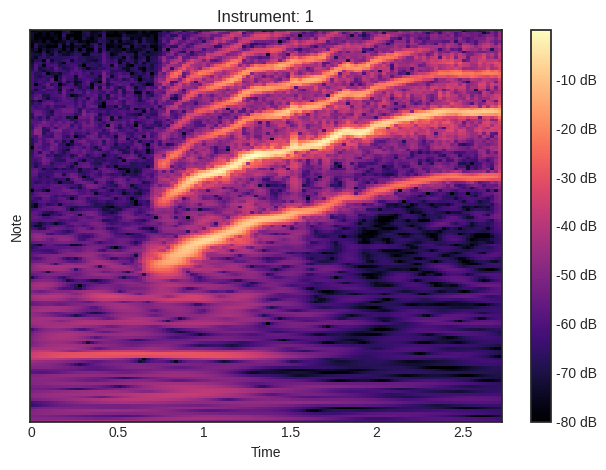

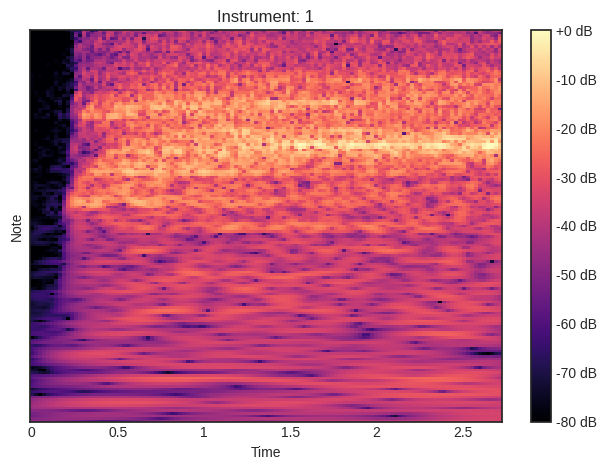

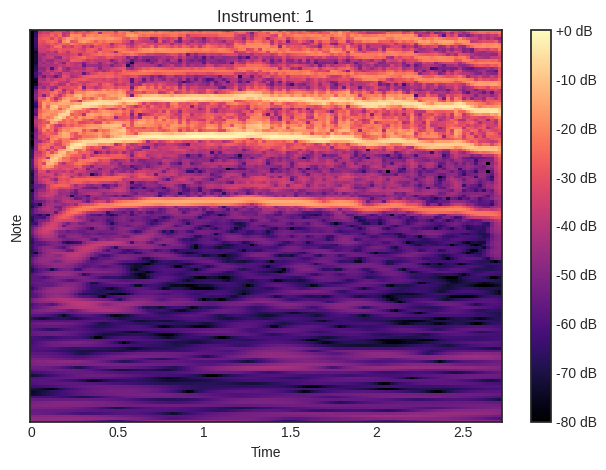

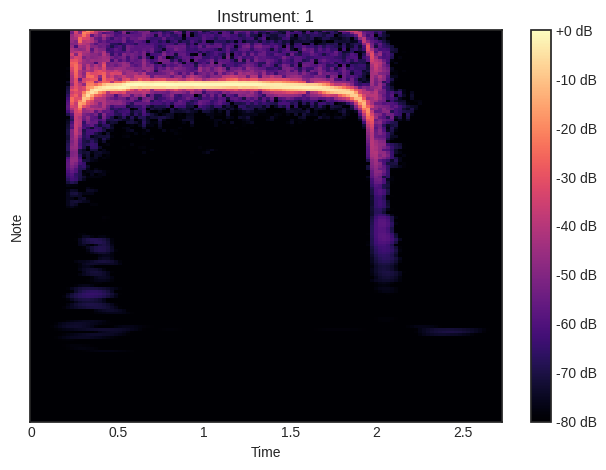

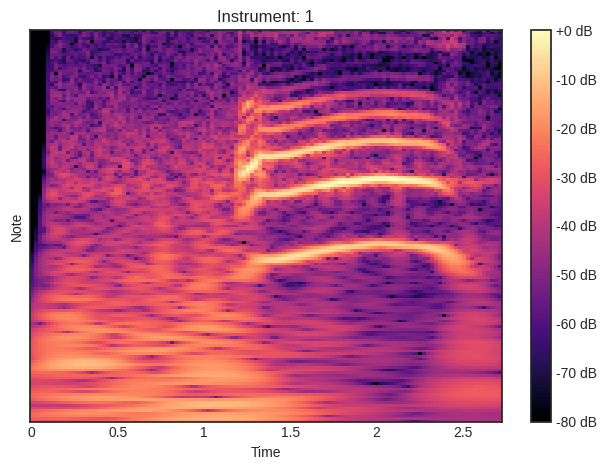

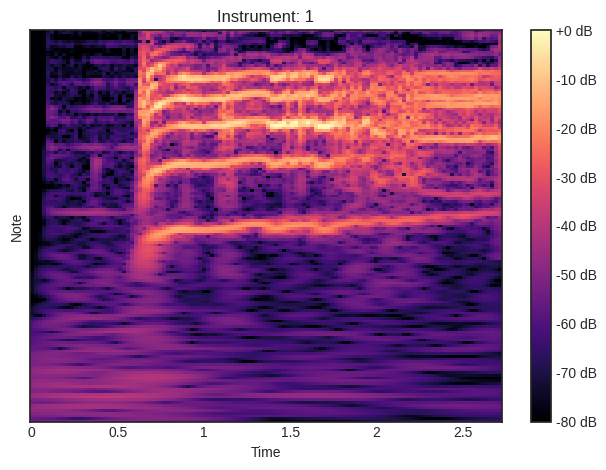

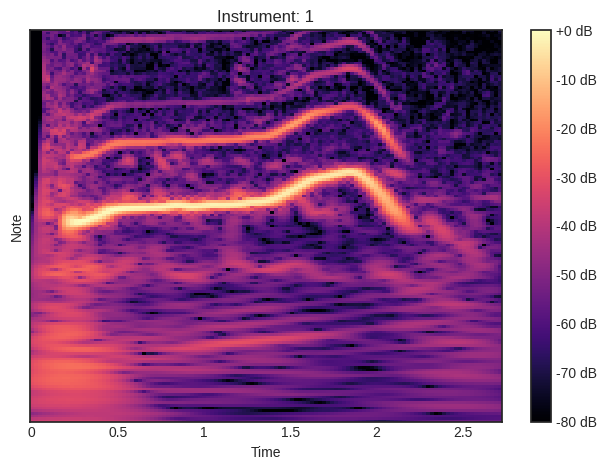

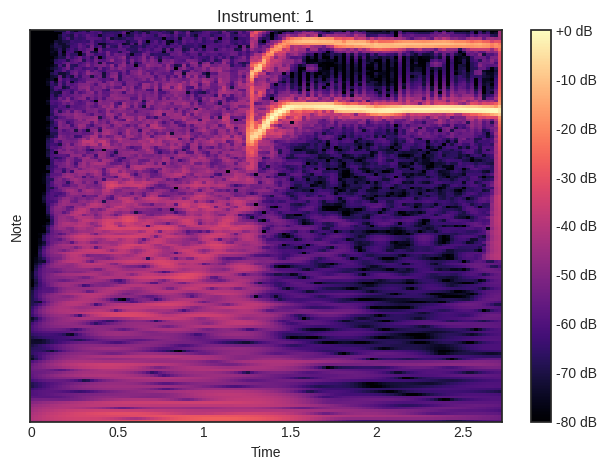

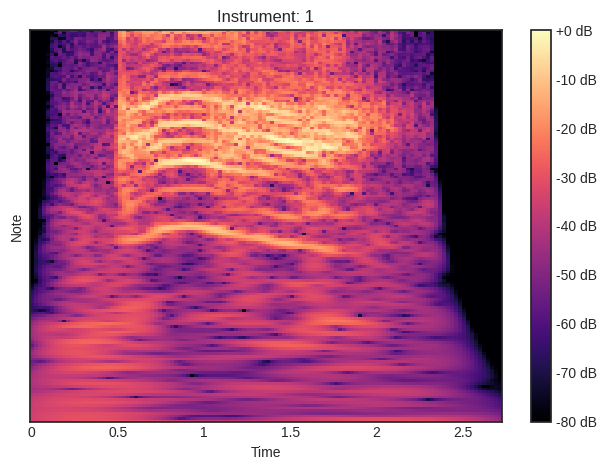

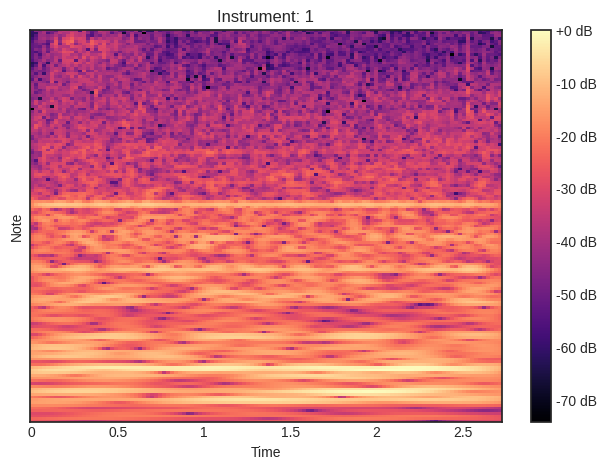

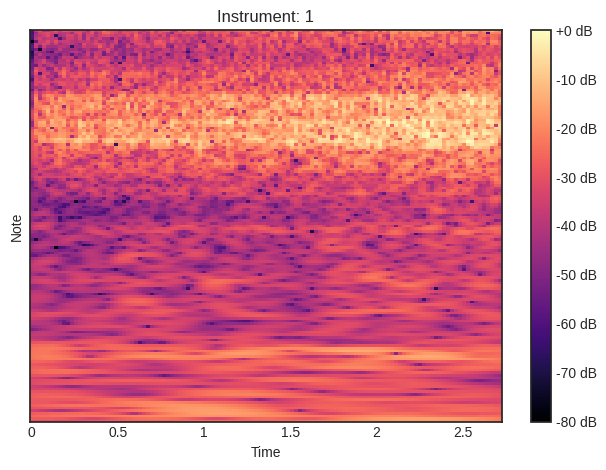

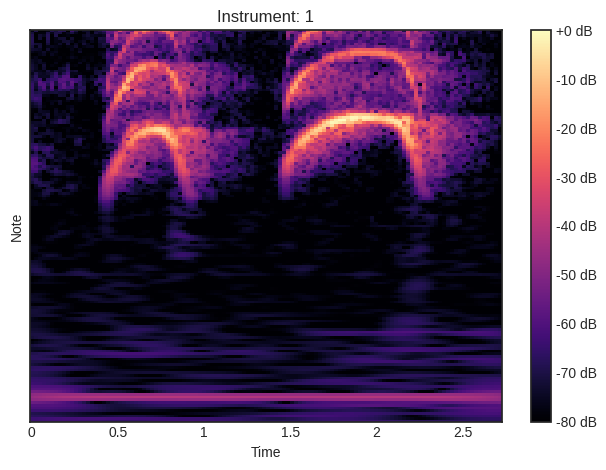

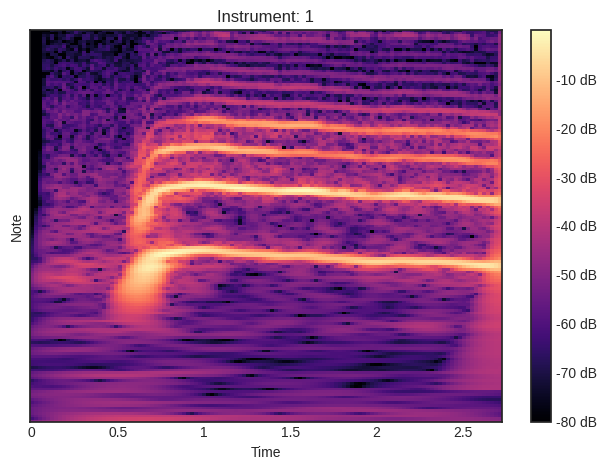

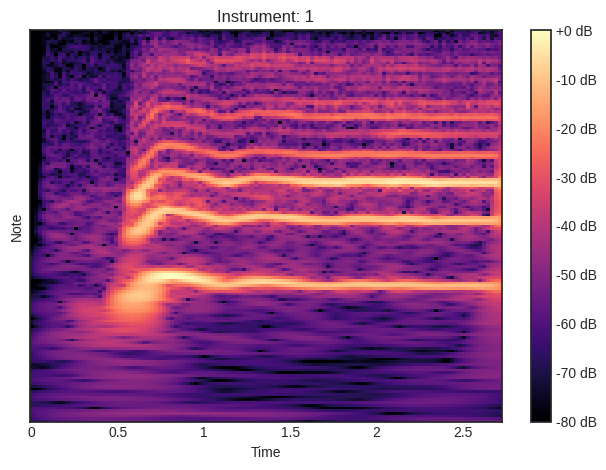

In [22]:
for i in range(0, len(X), 100):
  amp_db = librosa.amplitude_to_db(np.abs(audio_cqt[i]), ref=np.max)
  librosa.display.specshow(amp_db, sr=sr, x_axis='time', y_axis='cqt_note')
  plt.ylim(librosa.note_to_hz('C2'), librosa.note_to_hz('C14'))
  plt.colorbar(format='%+2.0f dB')
  plt.title('Instrument: {}'.format(y[i]))
  plt.tight_layout()
  plt.show()

In [23]:
cqt_np = np.array(audio_cqt, np.float32)
inst_np = np.array(y, np.int16)

print(cqt_np.shape, inst_np.shape)

(3174, 168, 118) (3174,)


In [25]:
cqt_np = cqt_np.reshape((3174, 168*118))

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(cqt_np)

MinMaxScaler()

MinMaxScaler()

In [29]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(cqt_np, inst_np, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)


(2539, 19824)
(635, 19824)
(2539,)
(635,)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.8346456692913385


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x, train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.7968503937007874


In [32]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.8330708661417323


In [52]:


cqt_np = np.array(audio_cqt, np.float32)
cqt_np = cqt_np.reshape((3174, 168*118))
cqt_array = np.expand_dims(cqt_np, -1)

train_x, test_x,  train_y, test_y = train_test_split(cqt_array, inst_np, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(2539, 19824, 1)
(635, 19824, 1)
(2539,)
(635,)


In [63]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout

def model_build():
  model = Sequential()

  input = Input(shape=(19824, ), name='input')
  output = Dense(256, activation='relu', name='hidden1')(input)
  output = Dropout(0.5)(output)
  output = Dense(128, activation='relu', name='hidden2')(output)
  output = Dropout(0.5)(output)
  # output = Dense(128, activation='relu', name='hidden3')(output)
  # output = Dropout(0.5)(output)
  output = Dense(1, activation='sigmoid', name='output')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['acc'])

  return model

In [64]:
model = model_build()
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 19824)]           0         
                                                                 
 hidden1 (Dense)             (None, 256)               5075200   
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 hidden2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 output (Dense)              (None, 1)                 129       
                                                                 
Total params: 5108225 (19.49 MB)
Trainable params: 5108225 

In [65]:
from keras.callbacks import EarlyStopping

# 검증 데이터의 손실이 3 에폭 동안 개선되지 않으면 훈련 중지
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [67]:
history = model.fit(train_x, train_y, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
16/16 [==============================] - 4s 152ms/step - loss: 0.7242 - acc: 0.7405 - val_loss: 0.4669 - val_acc: 0.8248
Epoch 2/10
16/16 [==============================] - 2s 107ms/step - loss: 0.4225 - acc: 0.8331 - val_loss: 0.2788 - val_acc: 0.8760
Epoch 3/10
16/16 [==============================] - 2s 103ms/step - loss: 0.3515 - acc: 0.8646 - val_loss: 0.2910 - val_acc: 0.8701
Epoch 4/10
16/16 [==============================] - 2s 101ms/step - loss: 0.3095 - acc: 0.8715 - val_loss: 0.2766 - val_acc: 0.8839
Epoch 5/10
16/16 [==============================] - 2s 102ms/step - loss: 0.2556 - acc: 0.8951 - val_loss: 0.2685 - val_acc: 0.8976
Epoch 6/10
16/16 [==============================] - 2s 107ms/step - loss: 0.2227 - acc: 0.9173 - val_loss: 0.2615 - val_acc: 0.8898
Epoch 7/10
16/16 [==============================] - 2s 158ms/step - loss: 0.1986 - acc: 0.9183 - val_loss: 0.2572 - val_acc: 0.9075
Epoch 8/10
16/16 [==============================] - 3s 172ms/step - loss: 0.